# Board Game Review Prediction

### Importing the required libraries

In [36]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading The dataset
**Dataset Description:**<br>name — name of the board game.<br>
playingtime — the playing time (given by the manufacturer).<br>
minplaytime — the minimum playing time (given by the manufacturer).<br>
maxplaytime — the maximum playing time (given by the manufacturer).<br>
minage — the minimum recommended age to play.<br>
users_rated — the number of users who rated the game.<br>
average_rating — the average rating given to the game by users. (0-10)<br>
total_weights — It isn't clearly defined but can be the complexity level of the game.<br>
average_weight — the average of all the subjective weights (0-5).

In [48]:
df_board=pd.read_csv("./games.csv")

In [49]:
df_board.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [50]:
df_board.shape

(81312, 20)

In [51]:
print(df_board.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


### Data Visualization and Exploration

In [52]:
df_board.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,81312.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000
mean,72278.150138,1806.630668,1.992018,5.637703,51.634788,49.276833,51.634788,6.983975,161.886585,4.212144,1.157632,262.502509,9.236423,12.688890,42.719144,49.290031,16.488009,0.908083
std,58818.237742,588.517834,0.931034,56.076890,345.699969,334.483934,345.699969,5.035138,1145.978126,3.056551,2.340033,1504.536693,39.757408,60.764207,239.292628,284.862853,115.980285,1.176002
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21339.750000,1984.000000,2.000000,2.000000,8.000000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43258.000000,2003.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,2.000000,5.265620,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,128836.500000,2010.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,16.000000,6.718777,0.000000,51.000000,2.000000,3.000000,7.000000,9.000000,2.000000,1.916700
max,184451.000000,2018.000000,99.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


In [53]:
df_board.isnull().sum()#Number of null values in the dataframe columns.

id                       0
type                     0
name                    41
yearpublished            3
minplayers               3
maxplayers               3
playingtime              3
minplaytime              3
maxplaytime              3
minage                   3
users_rated              0
average_rating           0
bayes_average_rating     0
total_owners             0
total_traders            0
total_wanters            0
total_wishers            0
total_comments           0
total_weights            0
average_weight           0
dtype: int64

average_rating column, which is the average of all the user ratings for a board game. Predicting this column could be useful to board game manufacturers who are thinking of what kind of game to make next, for instance. Therer

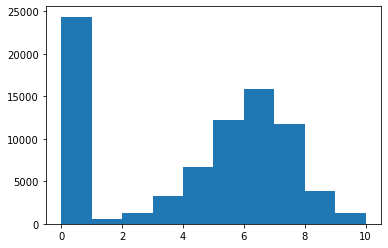

In [54]:
# The most useful column right now is average_rating, so we are visualizing it.
plt.hist(df_board['average_rating'])
plt.show()

Here, the average_rating for 25000 games are 0. To check what is going on with this, we need to print the first row of all the games with average_rating==0

In [55]:
print(df_board[df_board['average_rating']==0].iloc[0])#Filtering rows based on the condition 'average_rating==0'

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object


These seems like these games have never been played or published!!

In [56]:
print(df_board[df_board['average_rating']>0].iloc[0])

id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime                           180
minplaytime                           180
maxplaytime                           180
minage                                 13
users_rated                         20113
average_rating                    8.33774
bayes_average_rating              8.22186
total_owners                        26647
total_traders                         372
total_wanters                        1219
total_wishers                        5865
total_comments                       5347
total_weights                        2562
average_weight                     3.4785
Name: 0, dtype: object


We want games where people have actually reviewed the game.

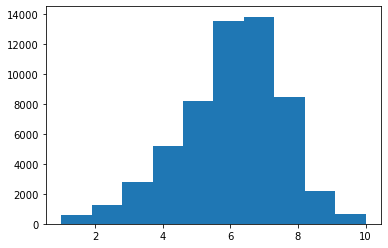

In [57]:
#Removing any rows without user rating
df_board=df_board[df_board['average_rating']>0]
#Removing any row with null values
df_board.dropna(axis=0,inplace=True)
#Plotting the histogram
plt.hist(df_board['average_rating'])
plt.show()

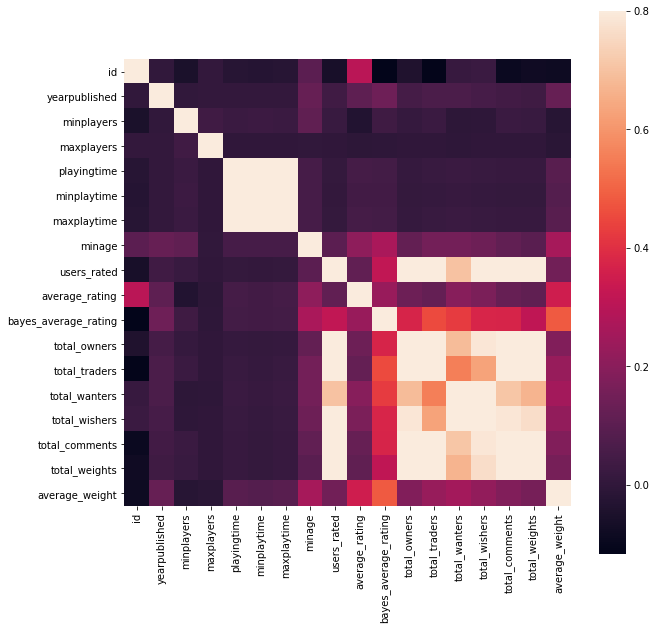

In [86]:
#Corelation Matrix: Finding the corelation among different fetures of the dataset
corelation=df_board.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corelation,vmax=.8,square=True)

Filtering out the columns: id, name, type, bayes_average_rating and average_rating from the dataset.

In [62]:
columns=df_board.columns.tolist()
columns=[c for c in columns if c not in ['bayes_average_rating','average_rating',"type",'name','id']]
y='average_rating'

### Data Modelling

Splitting the dataset into train and test set. The training data is 80% while the testdata is 20%

In [65]:
from sklearn.model_selection import train_test_split
train=df_board.sample(frac=.8,random_state=1)
test=df_board.loc[~df_board.index.isin(train.index)]
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


### 1.Linear Regression
It is the superivsed Learning Algorithm Model that assumes a linear relationship between the input varibale(X) and output variable(Y).

In [71]:
from sklearn.linear_model import LinearRegression
lin= LinearRegression()#Intializing the model
lin.fit(train[columns],train[y])

LinearRegression()

####                       Mean Squre Error= $(\frac{1}{n}\sum_{i=1}^{n}(y_i – \hat{y}_i)^{2}) $ 

In [72]:
from sklearn.metrics import mean_squared_error
prediction=lin.predict(test[columns])
mean_squared_error(prediction,test[y])

2.078819032629326

#### This is not a very good choice for the prediction as error is not very low. In the corelation matrix we saw that average_rating was not highly corelated with any of the features. <br> Trying the non-linear model Random Forest  Model.

### 2.Random Forest Regressor
It is a non-linear model based on decision tree model.

In [75]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)#Initializing the model
RFR.fit(train[columns],train[y])
prediction=RFR.predict(test[columns])
mean_squared_error(prediction,test[y])

1.4458560046071653

### Conclusion: Random Forest model is better than linear Regressor

**Predicting the value of average_rating(y) using both the models.**

In [77]:
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [83]:
#Predicting the value of y using both the models
rating_Lin=lin.predict(test[columns].iloc[0].values.reshape(1,-1))
rating_RFR=RFR.predict(test[columns].iloc[0].values.reshape(1,-1))
print(rating_Lin)
print(rating_RFR)

[8.12061283]
[7.91373581]


In [85]:
print(test[y].iloc[0])

8.07933
